<a href="https://colab.research.google.com/github/cyberpanda18/Codechef/blob/master/FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2020-07-22 10:42:29--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  22.3MB/s    in 16s     

2020-07-22 10:42:45 (20.9 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2020-07-22 10:42:54--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502
Saving to: ‘imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2020-07-22 10:42:55 (61.7 MB/s) - ‘imagelabels.mat’ saved [502

In [ ]:
import os
import numpy as np
import scipy.io
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [ ]:
train_x = []
train_y = []
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  train_y.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (150,150))
  normalized_img = cv2.normalize(resized, None, alpha=0, beta=1, 
                            norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  train_x.append(normalized_img)
train_x = np.array(train_x)

In [ ]:
trainx, valx, trainy, valy = train_test_split(train_x, train_y, test_size=0.15, random_state=10)

In [ ]:
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

Training Dataset Shape: ­(6960, 150, 150, 3)
No. of Training Dataset Labels: 6960


In [ ]:
training_images= trainx/255.0
test_images=valx/255.0
 
training_images = trainx.reshape((6960,150,150,3))
valx = valx.reshape((1229,150,150,3))
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))
print('Test Dataset Shape: {}'.format(valx.shape))
print('No. of Test Dataset Labels: {}'.format(len(valy)))

Training Dataset Shape: ­(6960, 150, 150, 3)
No. of Training Dataset Labels: 6960
Test Dataset Shape: (1229, 150, 150, 3)
No. of Test Dataset Labels: 1229


In [ ]:
trainy = to_categorical(trainy)
valy = to_categorical(valy)

In [ ]:
print(type(test_images))
print(type(valy))
from numpy import save
save('test_images.npy', training_images)
save('test_lables.npy',trainy)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


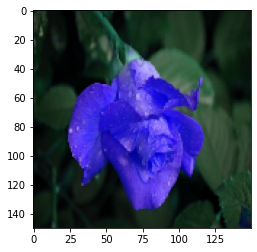

In [17]:
import matplotlib.pyplot as plt
plt.imshow(training_images[111])
print(trainy[111])

In [14]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
 
#add model layers
 
 
model = Sequential()
# #Layer 1
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(150, 150, 3),strides=(2,2)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
 
# #Layer 2
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
# #Layer 3
 
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
# #Layer 4
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
# #Input to Neural Network is flattened
model.add(Flatten())
# #1st hidden layer with 512 neurons/nodes
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
# #Output layer with 102 nodes for classifying 102 flowers
model.add(Dense(102, activation='softmax'))
#Compile the neural network
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
 
#Train the network
model.fit(trainx, trainy, validation_data = (valx, valy), epochs=80, batch_size=200)

Train on 6960 samples, validate on 1229 samples
Epoch 1/80
6960/6960 [==============================] - 161s 23ms/step - loss: 4.5377 - accuracy: 0.0273 - val_loss: 4.5004 - val_accuracy: 0.0586
Epoch 2/80
6960/6960 [==============================] - 159s 23ms/step - loss: 4.2562 - accuracy: 0.0602 - val_loss: 4.0668 - val_accuracy: 0.0976
Epoch 3/80
6960/6960 [==============================] - 160s 23ms/step - loss: 3.9256 - accuracy: 0.0796 - val_loss: 3.7993 - val_accuracy: 0.1115
Epoch 4/80
6960/6960 [==============================] - 159s 23ms/step - loss: 3.7159 - accuracy: 0.0963 - val_loss: 3.5629 - val_accuracy: 0.1196
Epoch 5/80
6960/6960 [==============================] - 159s 23ms/step - loss: 3.5518 - accuracy: 0.1193 - val_loss: 3.4644 - val_accuracy: 0.1448
Epoch 6/80
6960/6960 [==============================] - 158s 23ms/step - loss: 3.4331 - accuracy: 0.1425 - val_loss: 3.2107 - val_accuracy: 0.1766
Epoch 7/80
6960/6960 [==============================] - 158s 23ms/step

In [15]:
model.save('model.h5')
print('model saved')

model saved


In [16]:
from keras.models import load_model
model = load_model("model.h5")
 
score = model.evaluate(valx, valy)
 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
 
#Predict output on sample input data
pred = model.predict(valx) 
pred = np.argmax(pred, axis = 1)[:10] 
label = np.argmax(valy,axis = 1)[:10] 
 
print("Predicted labels:",pred) 
print("Actual Labels:   ",label)

1229/1229 [==============================] - 7s 6ms/step
Test loss: 1.6057563266490318
Test accuracy: 0.6631407737731934
Predicted labels: [ 50  66  29   7 101   4  90   1  71  77]
Actual Labels:    [ 50  66  50   7 101   4  90   1  85  77]
